In [1]:
import time
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt

import ten
from ten.mechanisms import forster, dexter

%matplotlib inline

## Creación de la NP

In [19]:
# Trampas (dopantes intrisicos) de la NP
trampas = ten.Aceptor(number=1, r_mechanisms=1, way='vol')
# Colorantes (dopantes) que le vamos a agregar a la NP
dopantes = ten.Aceptor(number=1500, r_mechanisms=4.684, way='sup')

# Nanoparticula
NP = ten.Nanoparticle(r_param=[22, 0], tau_d=0.333, mean_path=100, 
                      epsilon=1, traps=trampas)

print(NP)

Radio: 22 ~ U(22, 0),
Tau: 0.333, Mean_path: 100, Epsilon: 1,
Delta_t: 0.00333, Prob decay: 0.009950166250831893,
Number traps: 1, R_Mechanisms: 1, way: vol


In [20]:
ten.experiments.quenching(NP, dopantes, forster, 'laser', convergence=0.001)

(0.8242307692307692, 2285, 17.197769230769232, 13000, 18.799806594848633)

In [4]:
# Trampas (dopantes intrisicos) de la NP
trampas = ten.Aceptor(number=10, r_mechanisms=1, way='vol')
# Colorantes (dopantes) que le vamos a agregar a la NP
dopantes = ten.Aceptor(number=5, r_mechanisms=3.14, way='vol')

# Nanoparticula
NP = ten.Nanoparticle(r_param=[15, 0], tau_d=0.333, mean_path=80, 
                      epsilon=1, traps=trampas)

print(NP)

Radio: 15 ~ U(15, 0),
Tau: 0.333, Mean_path: 80, Epsilon: 1,
Delta_t: 0.0041625, Prob decay: 0.012422199506118559,
Number traps: 10, R_Mechanisms: 1, way: vol


## Experimentos posibles

### Eficiencia de Quenching

In [5]:
# Usando un mecanismo de Forster

out = ten.experiments.quenching(NP, dopantes, forster, 'laser', convergence=0.0001)
print("Eficiencia: {0}, Nº decaidos: {1}, Nº transferidos: {2}".format(out[0], out[1], out[3]-out[1]))
print("Pasos promedio: {0:.2f} nm, Tiempo total: {1:.2f} seg.".format(out[2], out[4]))

Eficiencia: 0.1583658536585366, Nº decaidos: 34507, Nº transferidos: 6493
Pasos promedio: 66.83 nm, Tiempo total: 8.09 seg.


In [6]:
# Usando un mecanismo de Dexter

out = ten.experiments.quenching(NP, dopantes, dexter, 'laser')
print("Eficiencia: {0}, Nº decaidos: {1}, Nº transferidos: {2}".format(out[0], out[1], out[3]-out[1]))
print("Pasos promedio: {0:.2f} nm, Tiempo total: {1:.2f} seg.".format(out[2], out[4]))

Eficiencia: 0.278, Nº decaidos: 2527, Nº transferidos: 973
Pasos promedio: 58.49 nm, Tiempo total: 13.31 seg.


### Exciton difusion length

In [6]:
# Trampas (dopantes intrisicos) de la NP
trampas = ten.Aceptor(number=10, r_mechanisms=1, way='vol')
# Colorantes (dopantes) que le vamos a agregar a la NP
dopantes = ten.Aceptor(number=5, r_mechanisms=3.14, way='vol')
# Nanoparticula
NP = ten.Nanoparticle(r_param=[15, 0], tau_d=0.333, mean_path=80, epsilon=1, traps=trampas)

out = ten.experiments.difusion_length(NP, forster, 'laser')
print("Exciton difusion length: {0:.2f} nm, Nº exitaciones: {1}".format(out[0], out[1]))
print("Tiempo total: {0:.2f} seg.".format(out[2]))

Exciton difusion length: 7.42 nm, Nº exitaciones: 1500
Tiempo total: 0.33 seg.


### Single photon counting

In [7]:
# Trampas (dopantes intrisicos) de la NP
trampas = ten.Aceptor(number=10, r_mechanisms=1, way='vol')
# Colorantes (dopantes) que le vamos a agregar a la NP
dopantes = ten.Aceptor(number=5, r_mechanisms=3.14, way='vol')
# Nanoparticula
NP = ten.Nanoparticle(r_param=[15, 0], tau_d=0.333, mean_path=80, epsilon=1, traps=trampas)

out = ten.experiments.single_count(NP, dopantes, forster, 'laser', exitations=3000)
out

(array([  18.,    0.,  113., ...,   73.,   56.,   48.]),
 3000,
 0.5662379264831543)

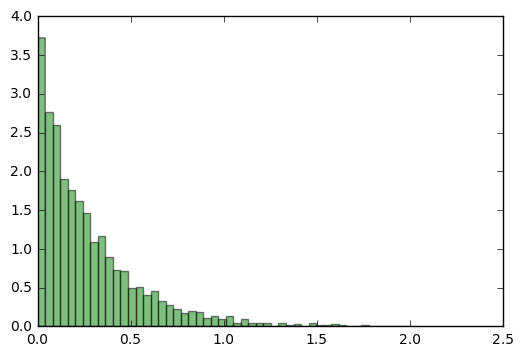

In [8]:
num_bins = 50
# the histogram of the data
n, bins, patches = plt.hist(out[0]*NP.delta_t, num_bins, normed=1, facecolor='green', alpha=0.5)
plt.show()

### Combinando los tres en uno

In [9]:
# Trampas (dopantes intrisicos) de la NP
trampas = ten.Aceptor(number=10, r_mechanisms=1, way='vol')
# Colorantes (dopantes) que le vamos a agregar a la NP
dopantes = ten.Aceptor(number=5, r_mechanisms=3.14, way='vol')
# Nanoparticula
NP = ten.Nanoparticle(r_param=[15, 0], tau_d=0.333, mean_path=80, epsilon=1, traps=trampas)

out = ten.experiments.tricota(NP, dopantes, forster, 'laser', convergence=0.0001)

text1 = "Eficiencia: {0}, Nº decaidos: {1}, Nº transferidos: {2}, Nº de exitaciones: {3}"
print(text1.format(out[0], out[1], out[3]-out[1], out[3]))
print("Cantidad pasos promedio: {0:.2f}, Tiempo total simu: {1:.2f} seg.".format(out[2], out[6]))
print("L_D: {0} nm".format(out[4]))

Eficiencia: 0.15770212765957448, Nº decaidos: 19794, Nº transferidos: 3706, Nº de exitaciones: 23500
Cantidad pasos promedio: 66.34, Tiempo total simu: 4.85 seg.
L_D: 7.0057688400547695 nm


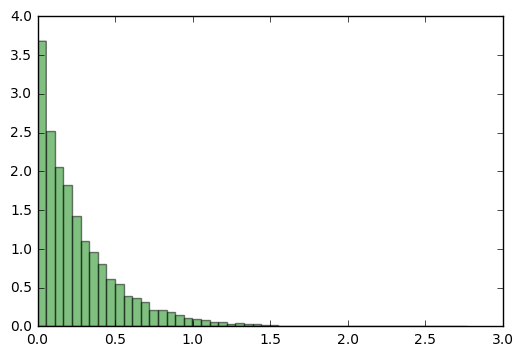

In [10]:
data = np.array(out[-2])
num_bins = 50
# the histogram of the data
n, bins, patches = plt.hist(data*NP.delta_t, num_bins, normed=1, facecolor='green', alpha=0.5)
plt.show()

## Variando el numero de ten.Aceptores

In [10]:
num = [10, 50, 100]
num_intrisic = [0, 1, 5, 10]

for j in num_intrisic:
    for i in num:
        # Dopantes propios (intrisicos) de la NP
        dopantes_propios = ten.Aceptor(number=i, r_mechanisms=1, way='vol')
        # Dopantes que le vamos a agregar a la NP
        dopantes = ten.Aceptor(number=j, r_mechanisms=3.14, way='vol')
        # Nanoparticula
        NP = ten.Nanoparticle(r_param=[15, 0], tau_d=0.333, mean_path=80, epsilon=1, 
                              intrinsic_aceptors=dopantes_propios)
        
        # Experiment
        out = experiments.quenching(NP, dopantes, forster, 'laser')
        print()
        print("Eficiencia: {0}, Nº decaidos: {1}, Nº transferidos: {2}".format(out[0], out[1], out[3]-out[1]))
        print("Pasos promedio: {0:.2f} nm, Tiempo total: {1:.2f} seg.".format(out[2], out[4]))


Eficiencia: 0.0245, Nº decaidos: 1951, Nº transferidos: 49
Pasos promedio: 76.50 nm, Tiempo total: 2.45 seg.

Eficiencia: 0.1185, Nº decaidos: 1763, Nº transferidos: 237
Pasos promedio: 71.39 nm, Tiempo total: 2.56 seg.

Eficiencia: 0.191, Nº decaidos: 1618, Nº transferidos: 382
Pasos promedio: 63.82 nm, Tiempo total: 2.41 seg.

Eficiencia: 0.0395, Nº decaidos: 1921, Nº transferidos: 79
Pasos promedio: 77.52 nm, Tiempo total: 2.17 seg.

Eficiencia: 0.116, Nº decaidos: 1768, Nº transferidos: 232
Pasos promedio: 70.93 nm, Tiempo total: 2.23 seg.

Eficiencia: 0.2096, Nº decaidos: 1976, Nº transferidos: 524
Pasos promedio: 63.30 nm, Tiempo total: 2.53 seg.

Eficiencia: 0.1328, Nº decaidos: 2168, Nº transferidos: 332
Pasos promedio: 68.30 nm, Tiempo total: 2.32 seg.

Eficiencia: 0.208, Nº decaidos: 1584, Nº transferidos: 416
Pasos promedio: 63.16 nm, Tiempo total: 1.94 seg.

Eficiencia: 0.2604, Nº decaidos: 1849, Nº transferidos: 651
Pasos promedio: 60.58 nm, Tiempo total: 2.46 seg.

Efici